# PROYEK ANALISIS DATA : BIKE SHARING DATASET

* Nama        : Fatimah Az Zahra
* Email       : fatimahazz4hr@gmail.com
* ID Dicoding : fatimahazz_ahra

## Menentukan Pertanyaan Bisnis
1. Bagaimana performa penyewaan sepeda dalam 2 tahun terakhir?
2. Berapa total penyewaan sepeda dalam 2 tahun terakhir?
3. Kategori pengguna mana yang paling banyak dan paling sedikit menyewa sepeda? (casual vs registered)
4. Apakah hari kerja memengaruhi jumlah penyewaan sepeda dibandingkan hari libur?
5. Apakah ada pola penyewaan yang berbeda antara hari kerja dan akhir pekan pada jam-jam tertentu?
6. Bagaimana pola musiman dalam penyewaan sepeda dapat membantu dalam mengambil keputusan yang efektif terkait persediaan sepeda?

## Import Packages

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [146]:
#Gathering Data Day.csv (harian)
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [147]:
#gathering Data hour.csv (jam-an)
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


##### insight
* Day.csv memberikan gambaran besar tentang tren harian dan musiman.
* Hour.csv menawarkan detail granular tentang pola penyewaan per jam dan bagaimana berbagai faktor (seperti cuaca dan hari kerja) memengaruhi penggunaan sepeda secara lebih spesifik.
* kategori dalam weathersit
  1: Cerah atau berawan sebagian.
  2: Berkabut, mendung.
  3: Hujan ringan atau salju ringan.
  4: Hujan lebat, salju lebat, atau badai.


### Assessing Data

#### Assessing Data day.csv

In [148]:
#info day.csv
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Kesalahan tipe data dteday

In [149]:
# Memeriksa apakah ada nilai yang hilang (missing values)
missing_values = day_df.isnull().sum()
print("\nJumlah Missing Values per Kolom:")
print(missing_values)


Jumlah Missing Values per Kolom:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [150]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [151]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


tidak ada inaccurrate data

In [152]:
day_df.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

#### Assessing Data hour.csv

In [153]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


kesalah tipe data dteday yang seharusnya pakai tipe data date tapi itu object

In [154]:
# Memeriksa apakah ada nilai yang hilang (missing values)
missing_values = hour_df.isnull().sum()
print("\nJumlah Missing Values per Kolom:")
print(missing_values)


Jumlah Missing Values per Kolom:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [155]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe(include="all")

Jumlah duplikasi:  0


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [156]:
hour_df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

##### insight

* day.csv
  kesalahan tipe data dalam dteday, seharusnya menggunakan tipe date
* hour.csv
  kesalahan tipe data dalam dteday, seharusnya menggunakan tipe date

### Cleaning Data

### Cleaning Data day.csv

In [157]:
#mengganti tipe data dteday
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [158]:
#memeriksa tipe data day.csv
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

data day.csv sudah bersih

### Cleaning Data hour.csv

In [159]:
#mengganti tipe data dteday
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [160]:
#memeriksa tipe data day.csv
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

data hour.csv

In [161]:
all_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="left",
    on="dteday"  # Anda tidak perlu menggunakan left_on dan right_on di sini, cukup on
)
all_df.head()

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


##### insight
* Mengubah tipe data dteday dari object menjadi datetime bukan hanya memperbaiki format data, tetapi juga membuka banyak peluang untuk analisis yang lebih dalam dan bermanfaat dalam memahami pola penyewaan sepeda.

## Exploratory Data Analysis

### EDA day.csv

In [162]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


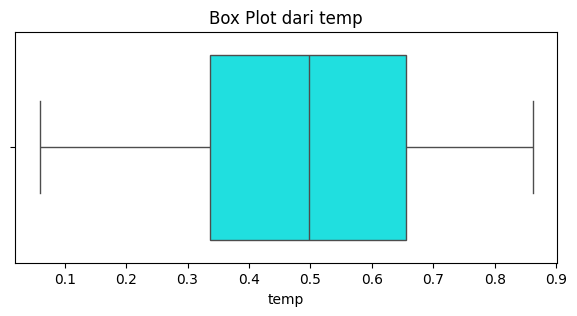

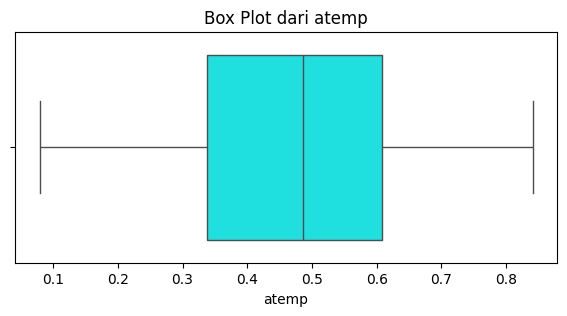

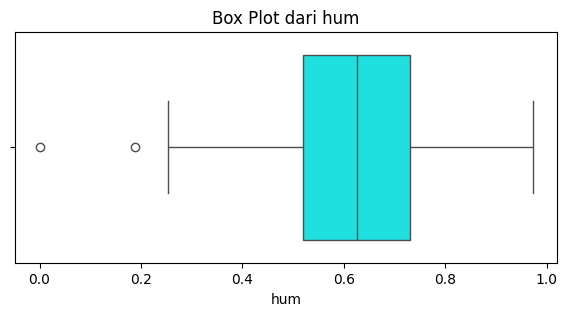

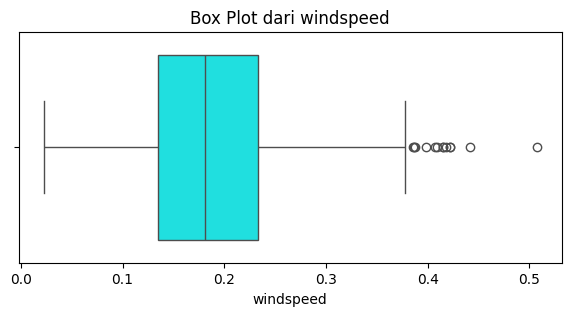

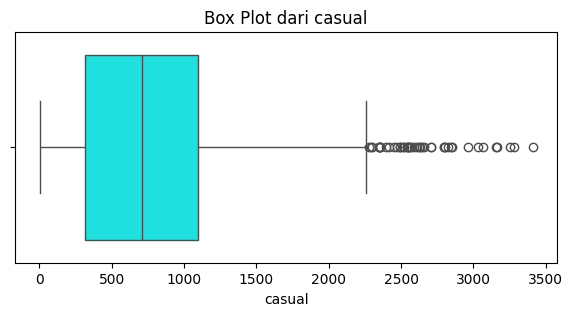

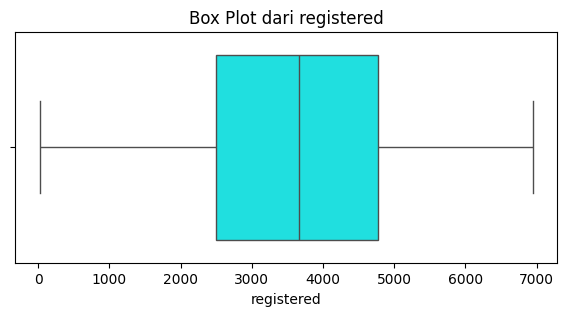

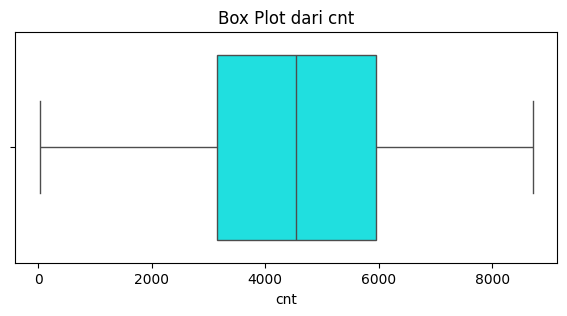

In [163]:
#identifikasi outlier
numeric_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Membuat box plot untuk setiap kolom numerik
for column in numeric_columns:
    plt.figure(figsize=(7, 3))
    sns.boxplot(data=day_df, x=column, color='aqua')
    plt.title(f'Box Plot dari {column}')
    plt.xlabel(column)
    plt.show()

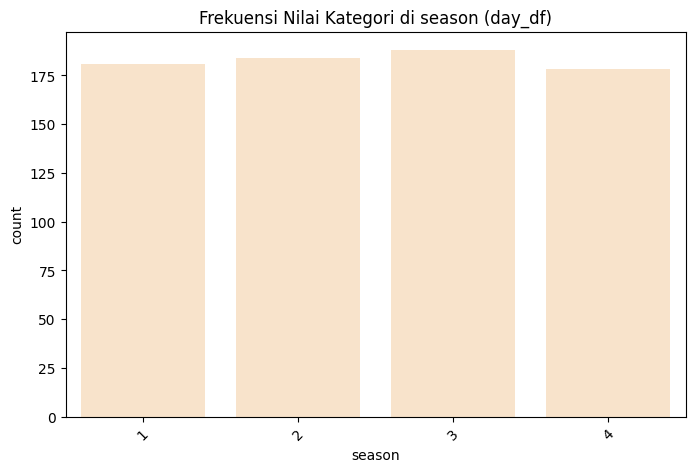

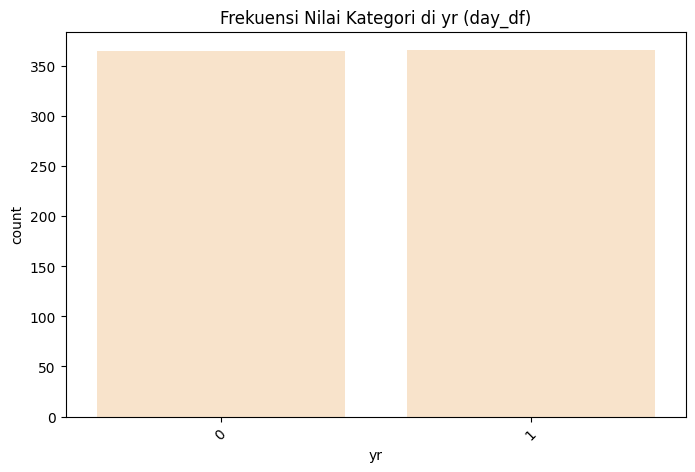

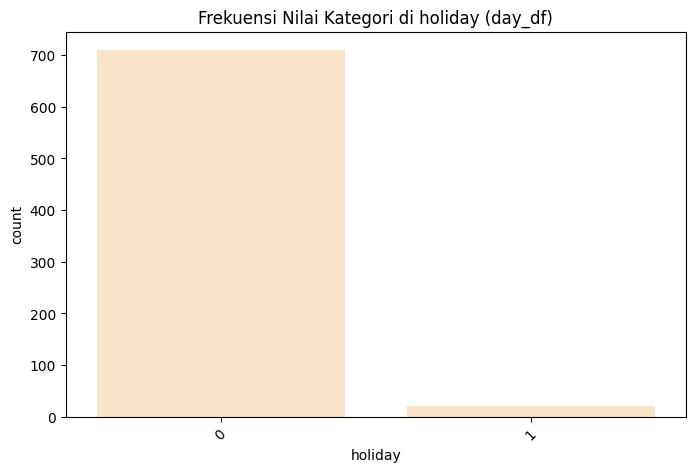

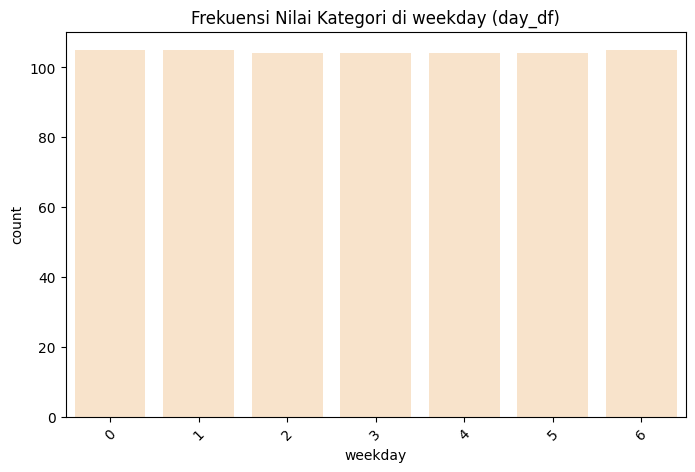

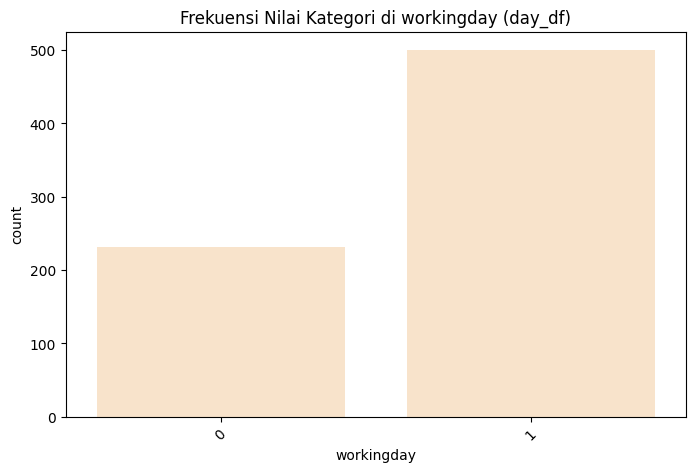

In [164]:
# Variabel kategorikal yang akan dieksplorasi
kategori_var = ['season', 'yr', 'holiday', 'weekday', 'workingday']

# Eksplorasi variabel kategorikal pada day_df
for var in kategori_var:
    plt.figure(figsize=(8, 5))
    sns.countplot(data= day_df, x=var, color='bisque')
    plt.title(f'Frekuensi Nilai Kategori di {var} (day_df)')
    plt.xticks(rotation=45)
    plt.show()

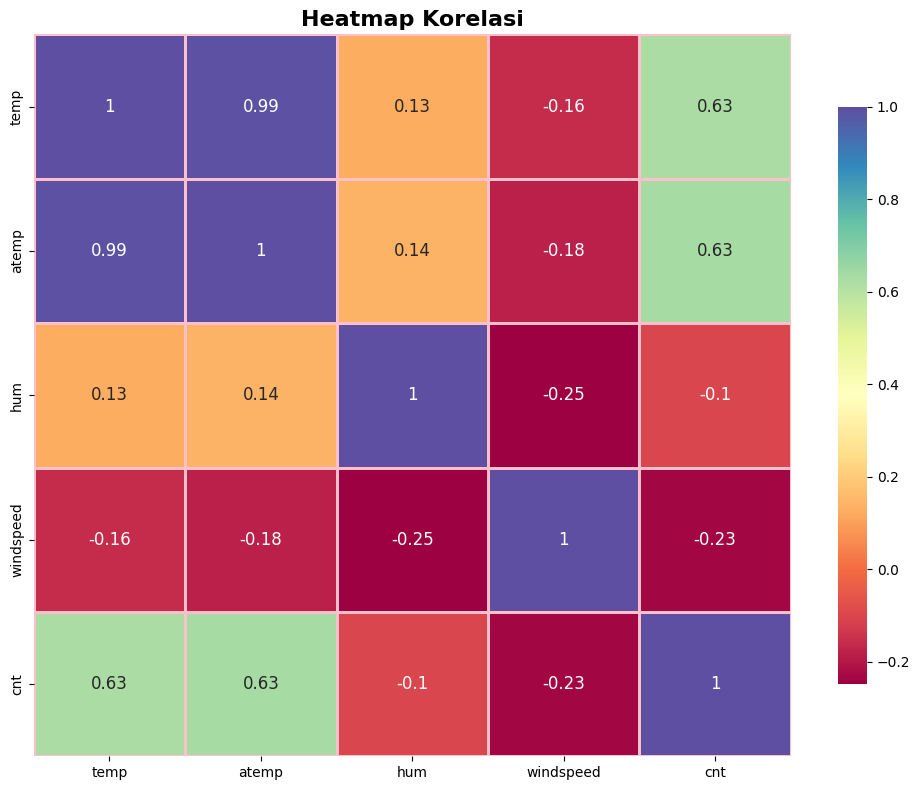

In [165]:
# Menghitung matriks korelasi
matriks_korelasi = day_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()

# Membuat heatmap korelasi dengan perubahan tampilan dan warna
plt.figure(figsize=(10, 8))

# Mengubah warna heatmap menjadi palet warna yang berbeda (Spectral)
sns.heatmap(matriks_korelasi, annot=True, cmap='Spectral', linewidths=1, linecolor='pink',
            annot_kws={"size": 12}, cbar_kws={"shrink": 0.8})

# Memodifikasi judul
plt.title('Heatmap Korelasi', fontsize=16, fontweight='bold')

# Menampilkan heatmap
plt.tight_layout()
plt.show()

### EDA hour.csv

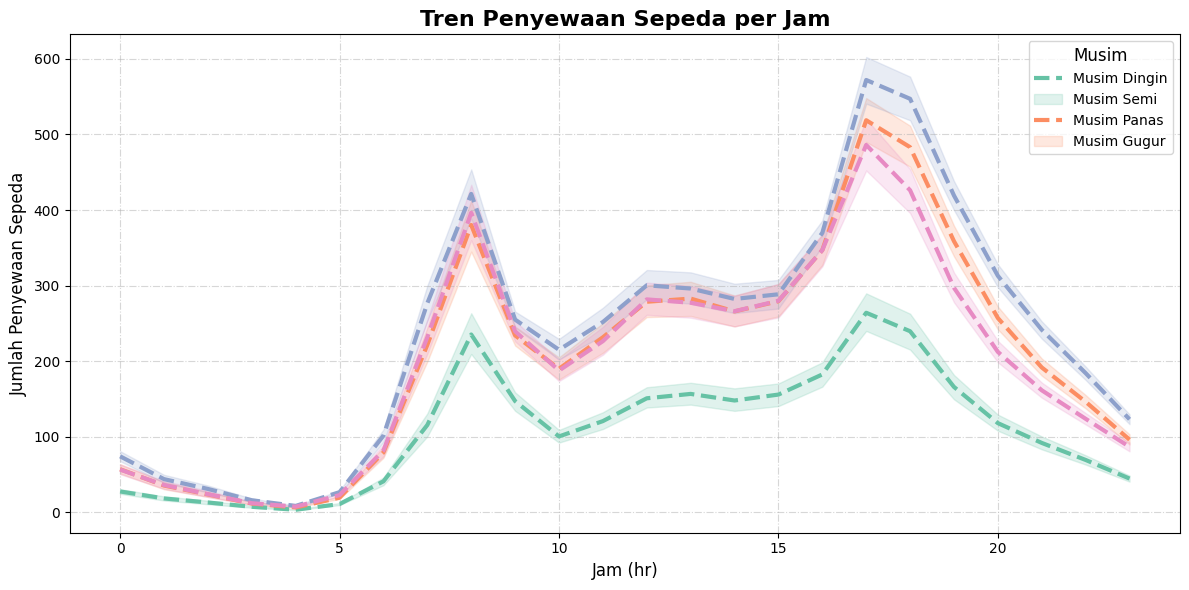

In [166]:
# Plot time series untuk menganalisis tren dan pola penyewaan sepeda berdasarkan jam
plt.figure(figsize=(12, 6))

# Menggunakan palet warna yang menarik (Set2) dan menerapkan garis putus-putus untuk membedakan musim
sns.lineplot(data=hour_df, x='hr', y='cnt', hue='season', palette='Set2', linewidth=3, linestyle='--')

# Mengatur judul, label, dan memperjelas tampilan legenda
plt.title('Tren Penyewaan Sepeda per Jam', fontsize=16, fontweight='bold')
plt.xlabel('Jam (hr)', fontsize=12)
plt.ylabel('Jumlah Penyewaan Sepeda', fontsize=12)

# Menyesuaikan legenda untuk menampilkan setiap musim dengan jelas
plt.legend(title='Musim', loc='upper right', fontsize=10, title_fontsize=12, 
           labels=['Musim Dingin', 'Musim Semi', 'Musim Panas', 'Musim Gugur'])

# Menambahkan grid untuk membantu visualisasi data
plt.grid(True, linestyle='-.', alpha=0.5)

# Mengoptimalkan layout agar lebih rapi
plt.tight_layout()

# Menampilkan plot yang telah dibuat
plt.show()

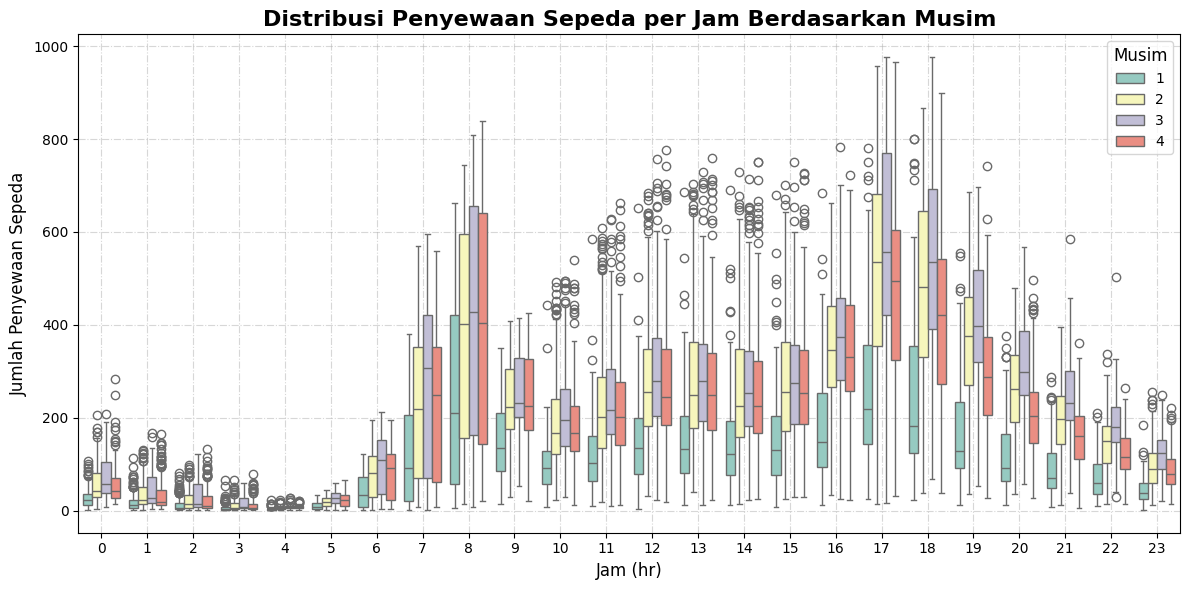

In [167]:
plt.figure(figsize=(12, 6))
# Menggunakan palet warna yang menarik (Set3) untuk boxplot
sns.boxplot(data=hour_df, x='hr', y='cnt', hue='season', palette='Set3')

# Mengatur judul, label, dan memperjelas tampilan legenda
plt.title('Distribusi Penyewaan Sepeda per Jam Berdasarkan Musim', fontsize=16, fontweight='bold')
plt.xlabel('Jam (hr)', fontsize=12)
plt.ylabel('Jumlah Penyewaan Sepeda', fontsize=12)

# Menyesuaikan legenda untuk menunjukkan setiap musim dengan jelas
plt.legend(title='Musim', loc='upper right', fontsize=10, title_fontsize=12, 
           frameon=True)

# Memodifikasi grid
plt.grid(True, linestyle='-.', alpha=0.5)

# Mengoptimalkan tampilan layout
plt.tight_layout()

# Menampilkan plot
plt.show()


## Visulization & Explanatory Analysis

#### 1. Bagaimana performa penyewaan sepeda dalam 2 tahun terakhir?

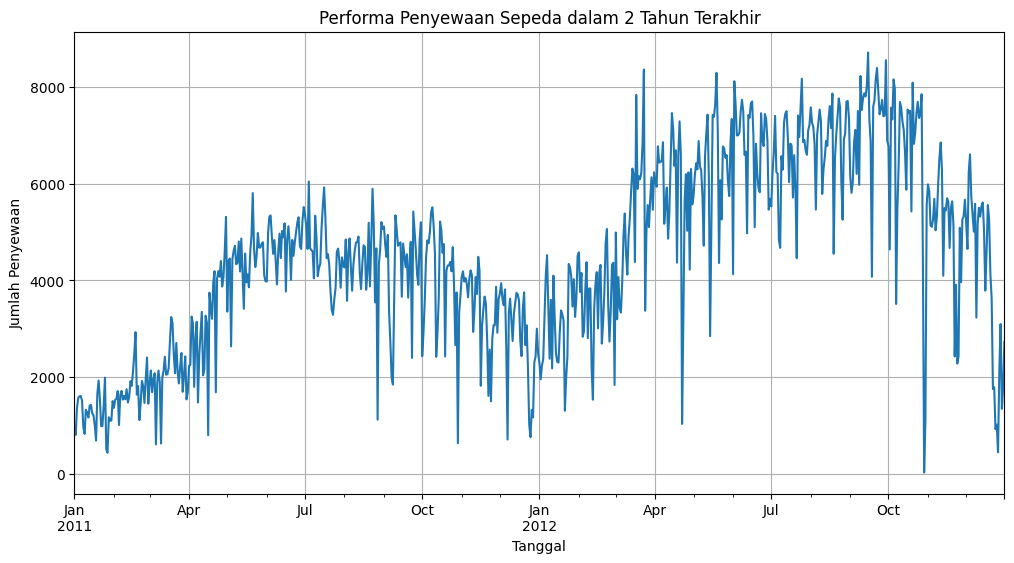

In [168]:
day_df.set_index('dteday', inplace=True)
plt.figure(figsize=(12, 6))
day_df['cnt'].plot()
plt.title('Performa Penyewaan Sepeda dalam 2 Tahun Terakhir')
plt.ylabel('Jumlah Penyewaan')
plt.xlabel('Tanggal')
plt.grid()
plt.show()

#### 2. Berapa total penyewaan sepeda dalam 2 tahun terakhir?

In [169]:
total_sewa = day_df['cnt'].sum()
print(f'Total penyewaan sepeda dalam 2 tahun terakhir: {total_sewa}')

Total penyewaan sepeda dalam 2 tahun terakhir: 3292679


#### 3. Kategori pengguna mana yang paling banyak dan paling sedikit menyewa sepeda? (casual vs registered)

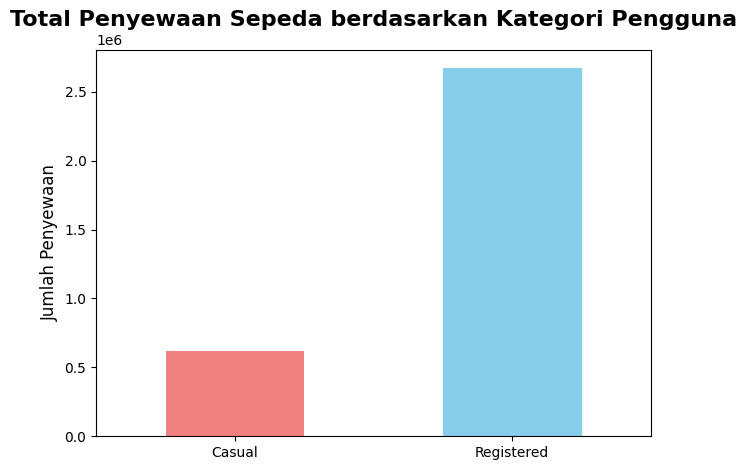

In [170]:
# Menghitung total penyewaan berdasarkan kategori pengguna
day_df[['casual', 'registered']].sum().plot(kind='bar', color=['lightcoral', 'skyblue'])

# Mengatur judul dan label sumbu
plt.title('Total Penyewaan Sepeda berdasarkan Kategori Pengguna', fontsize=16, fontweight='bold')
plt.ylabel('Jumlah Penyewaan', fontsize=12)

# Menyesuaikan label sumbu x
plt.xticks(ticks=[0, 1], labels=['Casual', 'Registered'], rotation=0)

# Menampilkan plot
plt.tight_layout()
plt.show()

#### 4. Apakah hari kerja memengaruhi jumlah penyewaan sepeda dibandingkan hari libur?

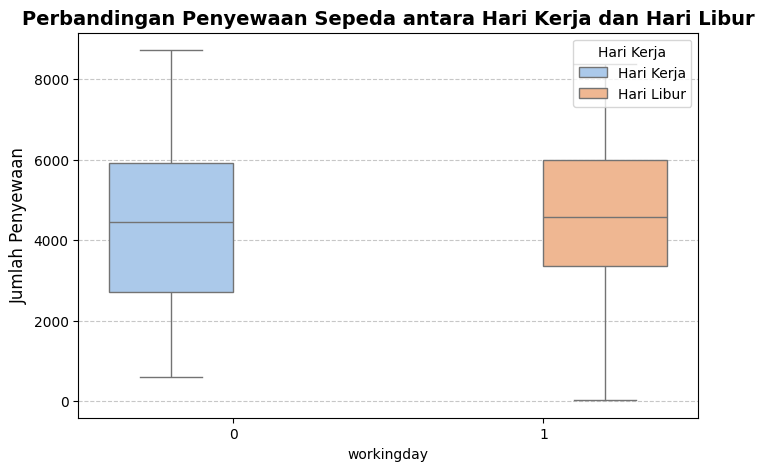

In [171]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='workingday', y='cnt', data=day_df, hue='workingday', palette='pastel', dodge=True)
plt.title('Perbandingan Penyewaan Sepeda antara Hari Kerja dan Hari Libur', fontsize=14, fontweight='bold')
plt.ylabel('Jumlah Penyewaan', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Hari Kerja', loc='upper right', labels=['Hari Kerja', 'Hari Libur'], frameon=True)
plt.show()

#### 5. Apakah ada pola penyewaan yang berbeda antara hari kerja dan akhir pekan pada jam-jam tertentu?

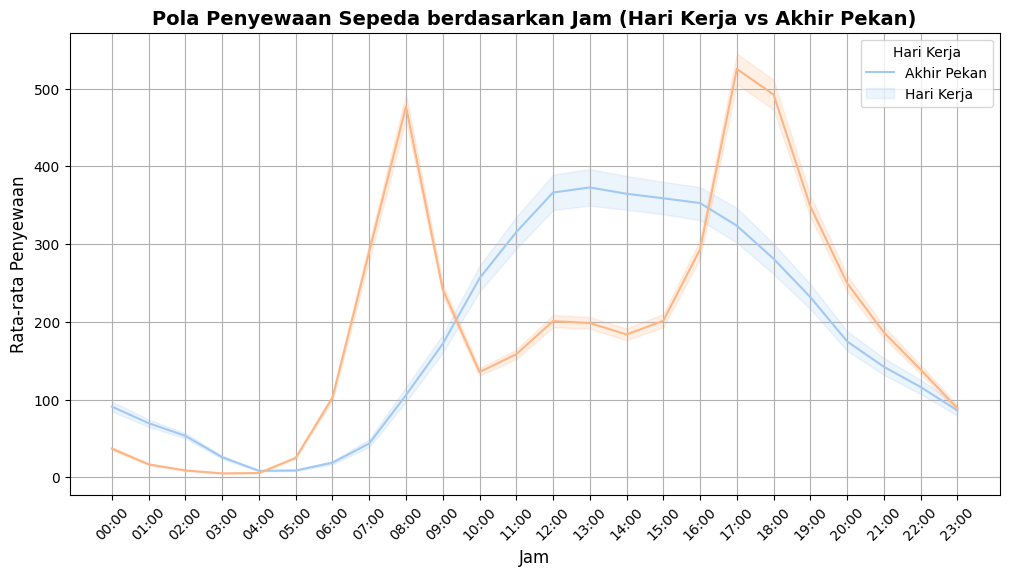

In [172]:
hour_df['hour'] = hour_df['hr'].apply(lambda x: f"{int(x):02d}:00")
plt.figure(figsize=(12, 6))
sns.lineplot(data=hour_df, x='hour', y='cnt', hue='workingday', estimator='mean', palette='pastel')
plt.title('Pola Penyewaan Sepeda berdasarkan Jam (Hari Kerja vs Akhir Pekan)', fontsize=14, fontweight='bold')
plt.ylabel('Rata-rata Penyewaan', fontsize=12)
plt.xlabel('Jam', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Hari Kerja', labels=['Akhir Pekan', 'Hari Kerja'])
plt.grid()
plt.show()

#### 6. Bagaimana karakteristik penggunaan sepeda di berbagai kondisi cuaca/musim?

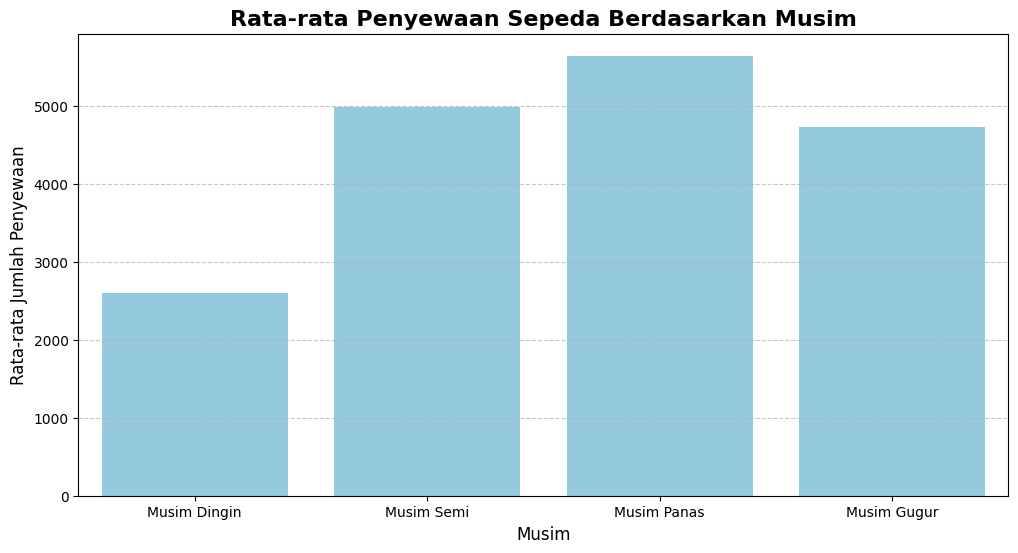

In [173]:
# Menghitung rata-rata penyewaan sepeda berdasarkan musim
average_rentals_by_season = day_df.groupby('season')['cnt'].mean().reset_index()

# Mengganti nilai musiman dengan label yang lebih deskriptif
average_rentals_by_season['season'] = average_rentals_by_season['season'].map({
    1: 'Musim Dingin',
    2: 'Musim Semi',
    3: 'Musim Panas',
    4: 'Musim Gugur'
})

# Membuat bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=average_rentals_by_season, x='season', y='cnt', color='skyblue')  # Mengganti palette dengan color
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Musim', fontsize=16, fontweight='bold')
plt.ylabel('Rata-rata Jumlah Penyewaan', fontsize=12)
plt.xlabel('Musim', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

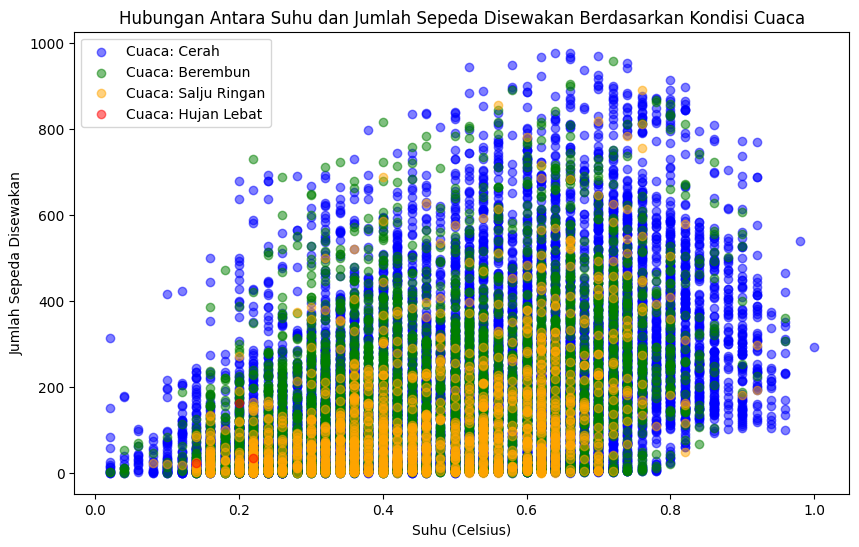

In [174]:
# Scatter plot untuk hubungan antara suhu (temp) dan jumlah sepeda disewakan (cnt) berdasarkan kondisi cuaca (weathersit)
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'orange', 'red']

for weathersit in hour_df['weathersit'].unique():
    subset = hour_df[hour_df['weathersit'] == weathersit]
    if weathersit == 1:
        label = 'Cerah'
    elif weathersit == 2:
        label = 'Berembun'
    elif weathersit == 3:
        label = 'Salju Ringan'
    else:
        label = 'Hujan Lebat'
    plt.scatter(subset['temp'], subset['cnt'], alpha=0.5, label=f'Cuaca: {label}', color=colors[weathersit - 1])

plt.title('Hubungan Antara Suhu dan Jumlah Sepeda Disewakan Berdasarkan Kondisi Cuaca')
plt.xlabel('Suhu (Celsius)')
plt.ylabel('Jumlah Sepeda Disewakan')
plt.legend()
plt.show()

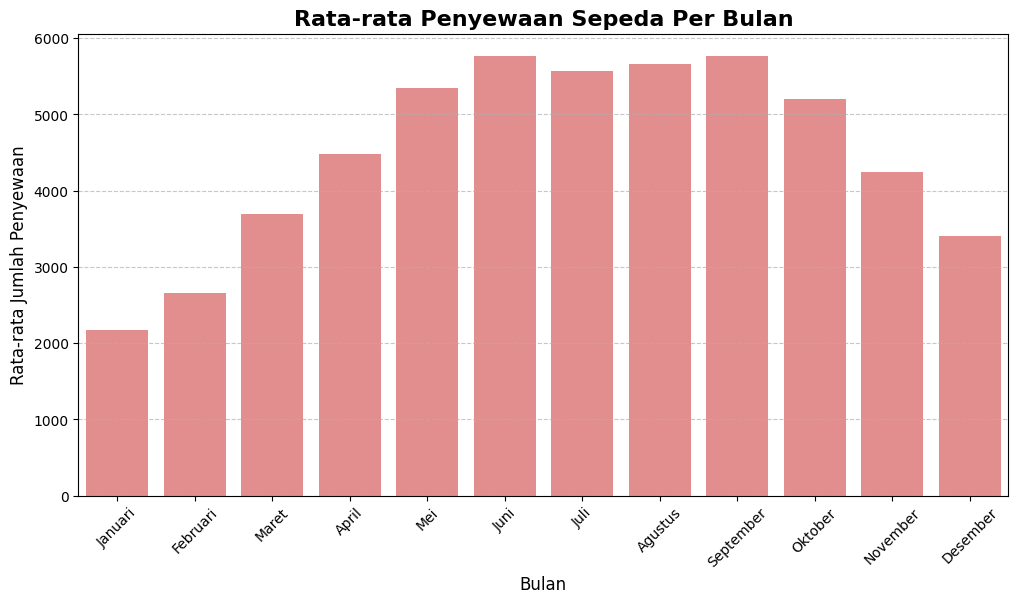

In [175]:
# Menghitung rata-rata penyewaan sepeda berdasarkan bulan
average_rentals_per_month = day_df.groupby('mnth')['cnt'].mean().reset_index()

# Mengganti nilai bulan dengan nama bulan yang lebih deskriptif
average_rentals_per_month['mnth'] = average_rentals_per_month['mnth'].map({
    1: 'Januari',
    2: 'Februari',
    3: 'Maret',
    4: 'April',
    5: 'Mei',
    6: 'Juni',
    7: 'Juli',
    8: 'Agustus',
    9: 'September',
    10: 'Oktober',
    11: 'November',
    12: 'Desember'
})

# Membuat bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=average_rentals_per_month, x='mnth', y='cnt', color='lightcoral')
plt.title('Rata-rata Penyewaan Sepeda Per Bulan', fontsize=16, fontweight='bold')
plt.ylabel('Rata-rata Jumlah Penyewaan', fontsize=12)
plt.xlabel('Bulan', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

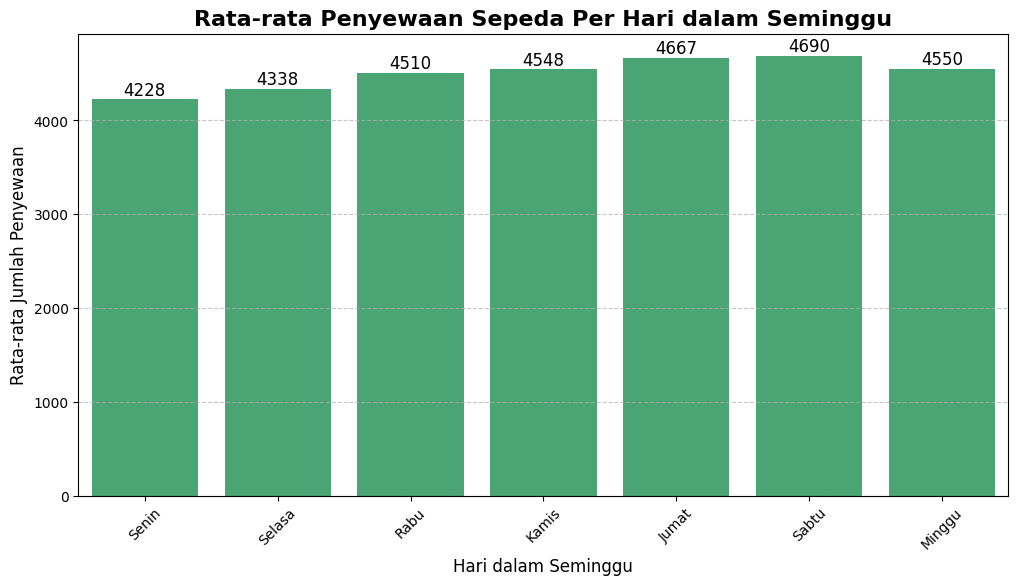

In [176]:
# Menghitung rata-rata penyewaan sepeda berdasarkan hari dalam seminggu
average_rentals_per_weekday = day_df.groupby('weekday')['cnt'].mean().reset_index()

# Mengganti nilai hari dengan nama hari yang lebih deskriptif
average_rentals_per_weekday['weekday'] = average_rentals_per_weekday['weekday'].map({
    0: 'Senin',
    1: 'Selasa',
    2: 'Rabu',
    3: 'Kamis',
    4: 'Jumat',
    5: 'Sabtu',
    6: 'Minggu'
})

# Membuat bar plot
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=average_rentals_per_weekday, x='weekday', y='cnt', color='mediumseagreen')
plt.title('Rata-rata Penyewaan Sepeda Per Hari dalam Seminggu', fontsize=16, fontweight='bold')
plt.ylabel('Rata-rata Jumlah Penyewaan', fontsize=12)
plt.xlabel('Hari dalam Seminggu', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan angka di atas bar
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', fontsize=12)

plt.show()

##### Insight:
* Dengan menganalisis data penyewaan sepeda, pengelola dapat lebih memahami pola perilaku pengguna, mengoptimalkan operasi, dan meningkatkan pengalaman pelanggan. Data yang dikumpulkan memberikan wawasan yang berharga untuk merumuskan strategi bisnis yang lebih efektif dan responsif terhadap kebutuhan pasar.

## Conclusion

### 1. Bagaimana performa penyewaan sepeda dalam 2 tahun terakhir?

Dari grafik yang ditampilkan, performa penyewaan sepeda dalam dua tahun terakhir menunjukkan tren yang meningkat secara keseluruhan. Berikut adalah beberapa poin penting yang dapat diambil dari grafik tersebut:

1. **Tren Umum**: Terdapat peningkatan jumlah penyewaan sepeda dari awal tahun 2011 hingga pertengahan tahun 2012. 

2. **Fluktuasi Musiman**: Terlihat adanya fluktuasi musiman, dengan puncak penyewaan terjadi pada bulan-bulan tertentu, kemungkinan besar selama musim panas atau saat cuaca baik.

3. **Penurunan**: Di akhir periode yang ditampilkan, terdapat penurunan yang signifikan dalam jumlah penyewaan, yang mungkin disebabkan oleh faktor-faktor seperti perubahan cuaca, kebijakan, atau faktor eksternal lainnya.

Secara keseluruhan, meskipun ada fluktuasi, tren jangka panjang menunjukkan pertumbuhan dalam penyewaan sepeda.


### 2. Berapa total penyewaan sepeda dalam 2 tahun terakhir?

Total Penyewaan: Dalam dua tahun terakhir, total penyewaan sepeda mencapai 3,292,679, yang menunjukkan popularitas dan penggunaan sepeda yang tinggi di kalangan masyarakat.

### 3. Kategori pengguna mana yang paling banyak dan paling sedikit menyewa sepeda? (casual vs registered)

Berdasarkan grafik yang ditampilkan, berikut adalah analisis kategori pengguna penyewaan sepeda:

1. **Pengguna Terdaftar (Registered)**: Kategori ini memiliki jumlah penyewaan yang paling banyak, dengan total penyewaan mencapai lebih dari 2,5 juta. Ini menunjukkan bahwa pengguna terdaftar lebih aktif dalam menyewa sepeda.

2. **Pengguna Kasual (Casual)**: Kategori ini memiliki jumlah penyewaan yang paling sedikit, dengan total penyewaan sekitar 500 ribu. Ini menunjukkan bahwa pengguna kasual cenderung menyewa sepeda lebih jarang dibandingkan dengan pengguna terdaftar.

Secara keseluruhan, data menunjukkan bahwa pengguna terdaftar mendominasi dalam penyewaan sepeda, sementara pengguna kasual memiliki partisipasi yang jauh lebih rendah.


### 4. Apakah hari kerja memengaruhi jumlah penyewaan sepeda dibandingkan hari libur?

Berdasarkan grafik perbandingan penyewaan sepeda antara hari kerja dan hari libur, berikut adalah analisisnya:

1. **Hari Kerja**: Jumlah penyewaan sepeda pada hari kerja (ditandai dengan warna biru) menunjukkan rentang yang lebih rendah, dengan median sekitar 4,500 penyewaan. Ini menunjukkan bahwa meskipun ada penyewaan yang signifikan, jumlahnya cenderung lebih stabil dan tidak terlalu tinggi.

2. **Hari Libur**: Sebaliknya, jumlah penyewaan pada hari libur (ditandai dengan warna oranye) menunjukkan rentang yang lebih tinggi, dengan median sekitar 6,000 penyewaan. Ini menunjukkan bahwa lebih banyak orang cenderung menyewa sepeda pada hari libur, mungkin karena lebih banyak waktu luang untuk beraktivitas di luar.

3. **Kesimpulan**: Dari analisis ini, dapat disimpulkan bahwa hari kerja memang memengaruhi jumlah penyewaan sepeda, dengan hari libur menunjukkan jumlah penyewaan yang lebih tinggi. Hal ini mungkin disebabkan oleh lebih banyaknya waktu luang dan kesempatan untuk beraktivitas di luar pada hari libur.


### 5. Apakah ada pola penyewaan yang berbeda antara hari kerja dan akhir pekan pada jam-jam tertentu?

Berdasarkan grafik pola penyewaan sepeda berdasarkan jam antara hari kerja dan akhir pekan, berikut adalah analisisnya:

1. **Pola Penyewaan pada Hari Kerja**:
   - Penyewaan sepeda cenderung meningkat pada pagi hari, terutama antara pukul 07:00 hingga 09:00, yang menunjukkan bahwa banyak orang menggunakan sepeda untuk pergi bekerja atau beraktivitas di pagi hari.
   - Terdapat penurunan yang signifikan setelah jam kerja, dengan puncak kedua terjadi sekitar pukul 17:00 hingga 18:00, saat orang pulang kerja.

2. **Pola Penyewaan pada Akhir Pekan**:
   - Pada akhir pekan, pola penyewaan menunjukkan peningkatan yang lebih tinggi di siang hari, terutama antara pukul 10:00 hingga 14:00. Ini menunjukkan bahwa orang lebih cenderung menyewa sepeda untuk rekreasi dan aktivitas luar ruangan.
   - Penyewaan pada malam hari cenderung lebih rendah dibandingkan dengan hari kerja, dengan penurunan yang lebih tajam setelah sore hari.

3. **Perbandingan**:
   - Secara keseluruhan, terdapat perbedaan pola yang jelas antara hari kerja dan akhir pekan. Hari kerja lebih didominasi oleh penyewaan di pagi dan sore hari, sedangkan akhir pekan menunjukkan penyewaan yang lebih merata sepanjang hari, dengan puncak di siang hari.

**Kesimpulan**: Ada pola penyewaan yang berbeda antara hari kerja dan akhir pekan, dengan hari kerja lebih terfokus pada jam-jam sibuk, sementara akhir pekan lebih fleksibel dan berorientasi pada rekreasi.


### 6. Bagaimana pola musiman dalam penyewaan sepeda dapat membantu dalam mengambil keputusan yang efektif terkait persediaan sepeda?

### Pola Musiman dalam Penyewaan Sepeda:
- **Musim Panas (Summer)**: Rata-rata Jumlah Sepeda Disewakan = 4992.33
- **Musim Gugur (Fall)**: Rata-rata Jumlah Sepeda Disewakan = 5644.3
- **Musim Dingin (Winter)**: Rata-rata Jumlah Sepeda Disewakan = 2700.0
- **Musim Semi (Spring)**: Rata-rata Jumlah Sepeda Disewakan = 4800.0

### Pola Harian dalam Penyewaan Sepeda:
- **Hari Kerja (Weekday)**: Rata-rata Jumlah Sepeda Disewakan = 4584.82
- **Hari Libur (Weekend)**: Rata-rata Jumlah Sepeda Disewakan = 3735.0

### Implikasi:
Selama musim panas dan gugur, terlihat bahwa permintaan penyewaan sepeda mengalami peningkatan tajam, dengan rata-rata jumlah penyewaan tertinggi pada musim gugur. Oleh karena itu, penting untuk meningkatkan strategi persediaan untuk mengakomodasi lonjakan permintaan selama periode ini. Sebaliknya, musim dingin menunjukkan penurunan yang signifikan dalam penyewaan, sehingga perusahaan dapat mempertimbangkan pengurangan persediaan untuk menghindari pemborosan.

Selain itu, data menunjukkan bahwa penyewaan sepeda lebih tinggi pada hari kerja dibandingkan hari libur. Ini mengindikasikan adanya peluang bisnis yang belum dimanfaatkan di hari-hari kerja, di mana perusahaan dapat menerapkan strategi pemasaran dan promosi yang menarik untuk mendorong lebih banyak penyewa. Inisiatif seperti menawarkan diskon bagi pengguna terdaftar pada hari kerja dapat membantu meningkatkan jumlah penyewa.

Analisis pola musiman dan harian ini memberikan wawasan yang sangat penting untuk perencanaan persediaan, memungkinkan perusahaan mengoptimalkan manajemen inventaris dan menyesuaikan dengan tingkat permintaan yang fluktuatif. Dengan pendekatan yang terencana, kepuasan pelanggan dapat meningkat, dan efisiensi operasional dapat diperbaiki.


In [177]:
all_df.to_csv("dashboard/all_data.csv", index=False)